In [268]:
cd(@__DIR__)
include("utils.jl")

Monthly_stats

Marking a calendar of 100 years

In [269]:
k=100
DatesRange=Date(1900):Day(1):Date(1900+k)
N=length(DatesRange)

36525

# AR model on the whole series

## AR(1)

In [270]:
x0=7.
Φ,σ=0.7,4

(0.7, 4)

Simulating the series

In [271]:
x=[x0 ; simulation(x0,Φ,σ,N-1)]

36525-element Vector{Float64}:
   7.0
  -0.8932352341409686
  -0.6977727502739343
  -2.958763661518551
 -10.12309367498999
  -6.425112380662213
  -5.670153637870081
   0.03940088159400945
  -0.7791979431702825
   2.785995129009491
   ⋮
   7.929509100149406
  12.360447219466788
   9.457295083025494
   0.026251106286066417
  -3.448837259680505
  -2.4105962458318273
  -5.025987651636209
  -2.0974681001604574
  -3.10937917796904

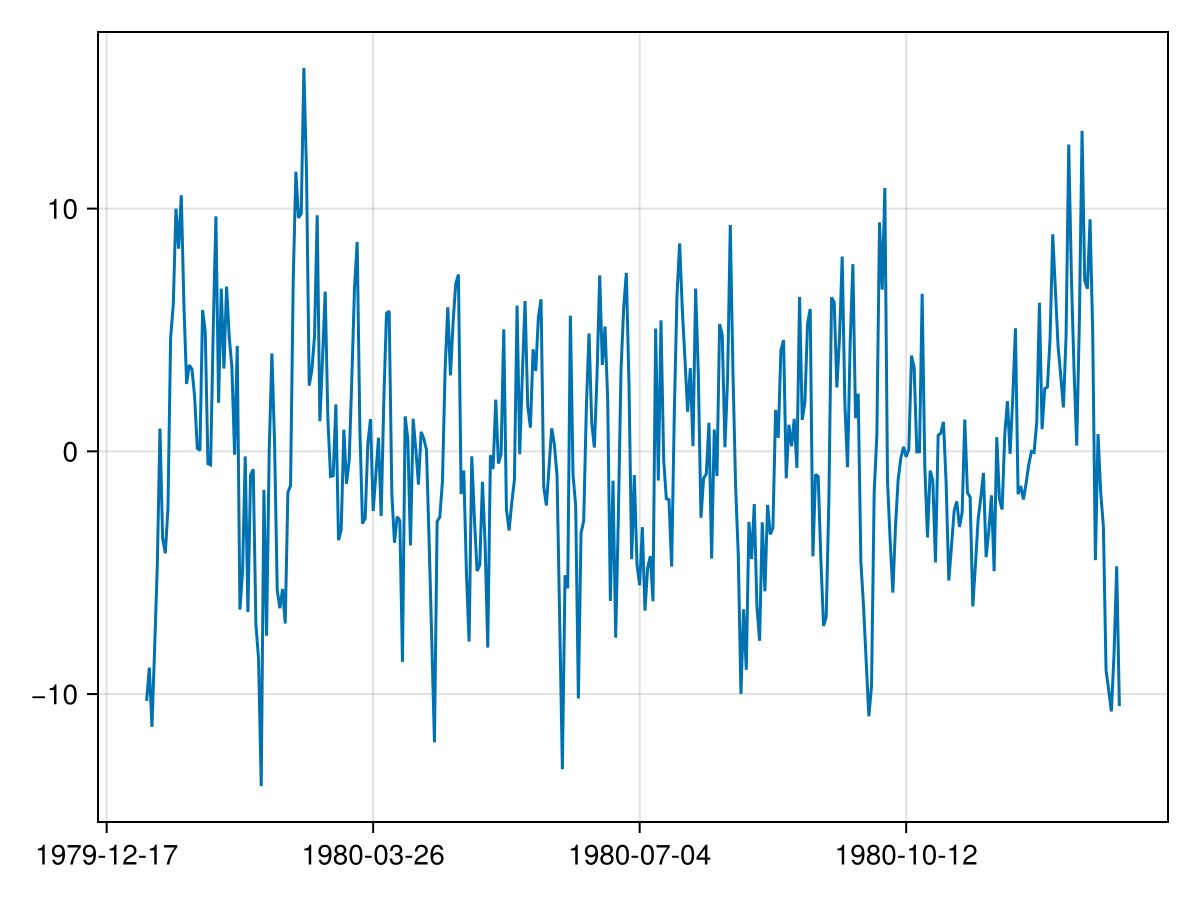

In [272]:
lines(DatesRange[Iyear(DatesRange,1980)],x[Iyear(DatesRange,1980)])

In [273]:
include("utils.jl")
Parameters_est=LL_AR_Estimation(x,1)
Φ_hat, σ_hat=Parameters_est[1][1] , Parameters_est[2]^0.5
Φ_error_table = DataFrame("Estimation Method"=>"Whole series", "Error"=>abs(Φ_hat-Φ), "Relative error"=>abs(Φ_hat-Φ)/abs(Φ))
σ_error_table = DataFrame("Estimation Method"=>"Whole series", "Error"=>abs(σ_hat-σ), "Relative error"=>abs(σ_hat-σ)/abs(σ))

Row,Estimation Method,Error,Relative error
,String,Float64,Float64
1,Whole series,0.0346958,0.00867394


It seems to work correctly

## AR(2)

In [274]:
x0=[7.,-3]
#Φ,σ=[0.1,-0.3],6

2-element Vector{Float64}:
  7.0
 -3.0

In [275]:
RootAR(Φ)

MethodError: MethodError: no method matching RootAR(::Float64)
The function `RootAR` exists, but no method is defined for this combination of argument types.

Closest candidates are:
  RootAR(!Matched::Vector)
   @ Main c:\Users\goninarn\Desktop\AR\utils.jl:30


In [276]:
x=[x0 ; simulation(x0,Φ,σ,N-1)]

MethodError: MethodError: no method matching simulation(::Vector{Float64}, ::Float64, ::Int64, ::Int64)
The function `simulation` exists, but no method is defined for this combination of argument types.

Closest candidates are:
  simulation(::Vector, !Matched::Vector, ::Number, ::Int64)
   @ Main c:\Users\goninarn\Desktop\AR\utils.jl:73
  simulation(::Vector, !Matched::Vector, ::Any, ::Any)
   @ Main c:\Users\goninarn\Desktop\AR\utils.jl:59
  simulation(!Matched::Number, ::Number, ::Any, ::Any)
   @ Main c:\Users\goninarn\Desktop\AR\utils.jl:83


In [277]:
include("utils.jl")
LL_AR_Estimation(x,2)

([0.699966353232005, -0.004745891615183511], 16.277945797915898)

# AR model on each month

Parameters for each month

In [278]:
Φ_month=[4,1,8,2,7,9,2,4,1,3,1,2]/10
σ_month=[1.5,2,4.5,7,8,3,4.5,1,7,2.5,3,6]

12-element Vector{Float64}:
 1.5
 2.0
 4.5
 7.0
 8.0
 3.0
 4.5
 1.0
 7.0
 2.5
 3.0
 6.0

Generation of the series associated

In [279]:
n_month=200
x=SimulateMonth(4.,Date(2000,11,1),Φ_month,σ_month,n_month)
Date_vec=collect(Date(2000,11,1):(Date(2000,11,1) + Month(n_month) - Day(1)))

6086-element Vector{Date}:
 2000-11-01
 2000-11-02
 2000-11-03
 2000-11-04
 2000-11-05
 2000-11-06
 2000-11-07
 2000-11-08
 2000-11-09
 2000-11-10
 ⋮
 2017-06-22
 2017-06-23
 2017-06-24
 2017-06-25
 2017-06-26
 2017-06-27
 2017-06-28
 2017-06-29
 2017-06-30

Separation of the months

In [280]:
Monthly_date=MonthlySeparateDates(Date_vec)
Monthly_temp=MonthlySeparateX(x,Date_vec)

12-element Vector{Vector{Any}}:
 [[-4.599537334740276, -1.6871436682354817, -2.9269304467100623, -1.5902141169808903, 0.6822641067525237, -1.9541404774139108, -1.306987559839258, -0.4649829236072019, -0.5054303003148978, -0.5547722393392489  …  0.4410772249342321, 0.4775408238657971, 1.7110111556763994, 0.4166956947932313, -1.5556684465594468, -0.03985064132197247, -2.600554223335299, 0.6552474131824082, 0.3160488679164158, 1.4356956095381441], [-4.265363712838523, -0.6891998500520493, -3.177094760121096, -3.353052570679229, -0.14542154057737844, -2.5676441523925173, 0.10724185831081057, -0.4234943810077805, 1.2162730800940897, -1.0983776058363686  …  0.586238775522672, -1.3068839753492536, -2.66078984594639, -1.7440345306157508, 2.3312659763578503, 0.9443583607758991, 0.16674613994491339, 3.136840291669071, 1.698924428337465, -1.5552506034499833], [-1.84580218424152, -1.955407986408886, -1.5852758606413389, -0.7012678494871797, 0.42171716373985696, 0.3362569918878551, 0.16951797443332

## Autocorrelations

### ACF/PACF on the whole series

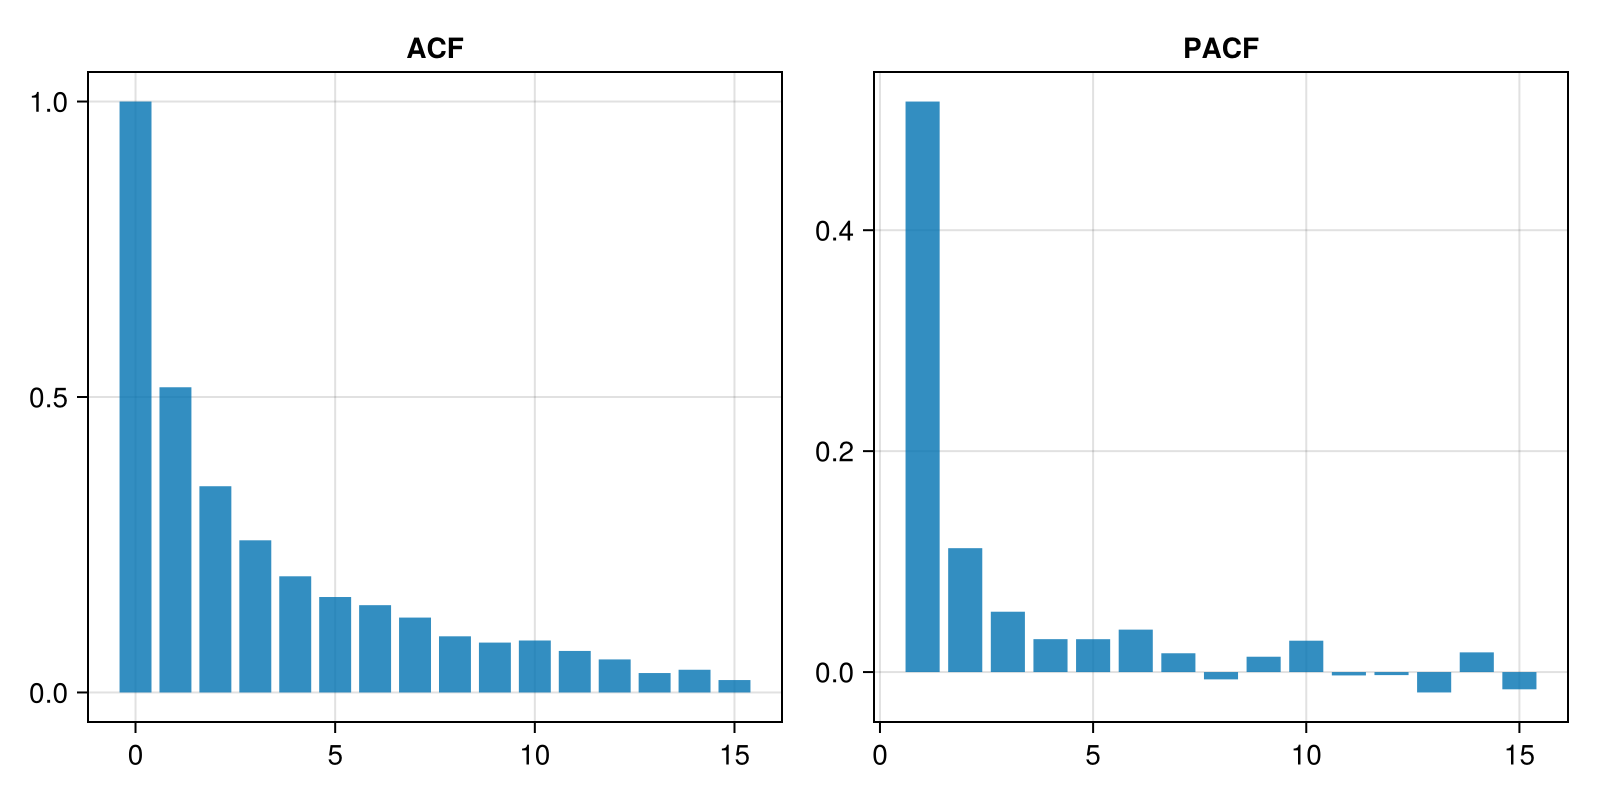

In [281]:
fig=Figure(size=(800,400))
ax1 ,plt1 = barplot(fig[1,1],0:15, autocor(x,0:15))
ax1.title="ACF"
ax2 ,plt2 = barplot(fig[1,2],1:15, pacf(x,1:15))
ax2.title="PACF"
fig

### ACF per month

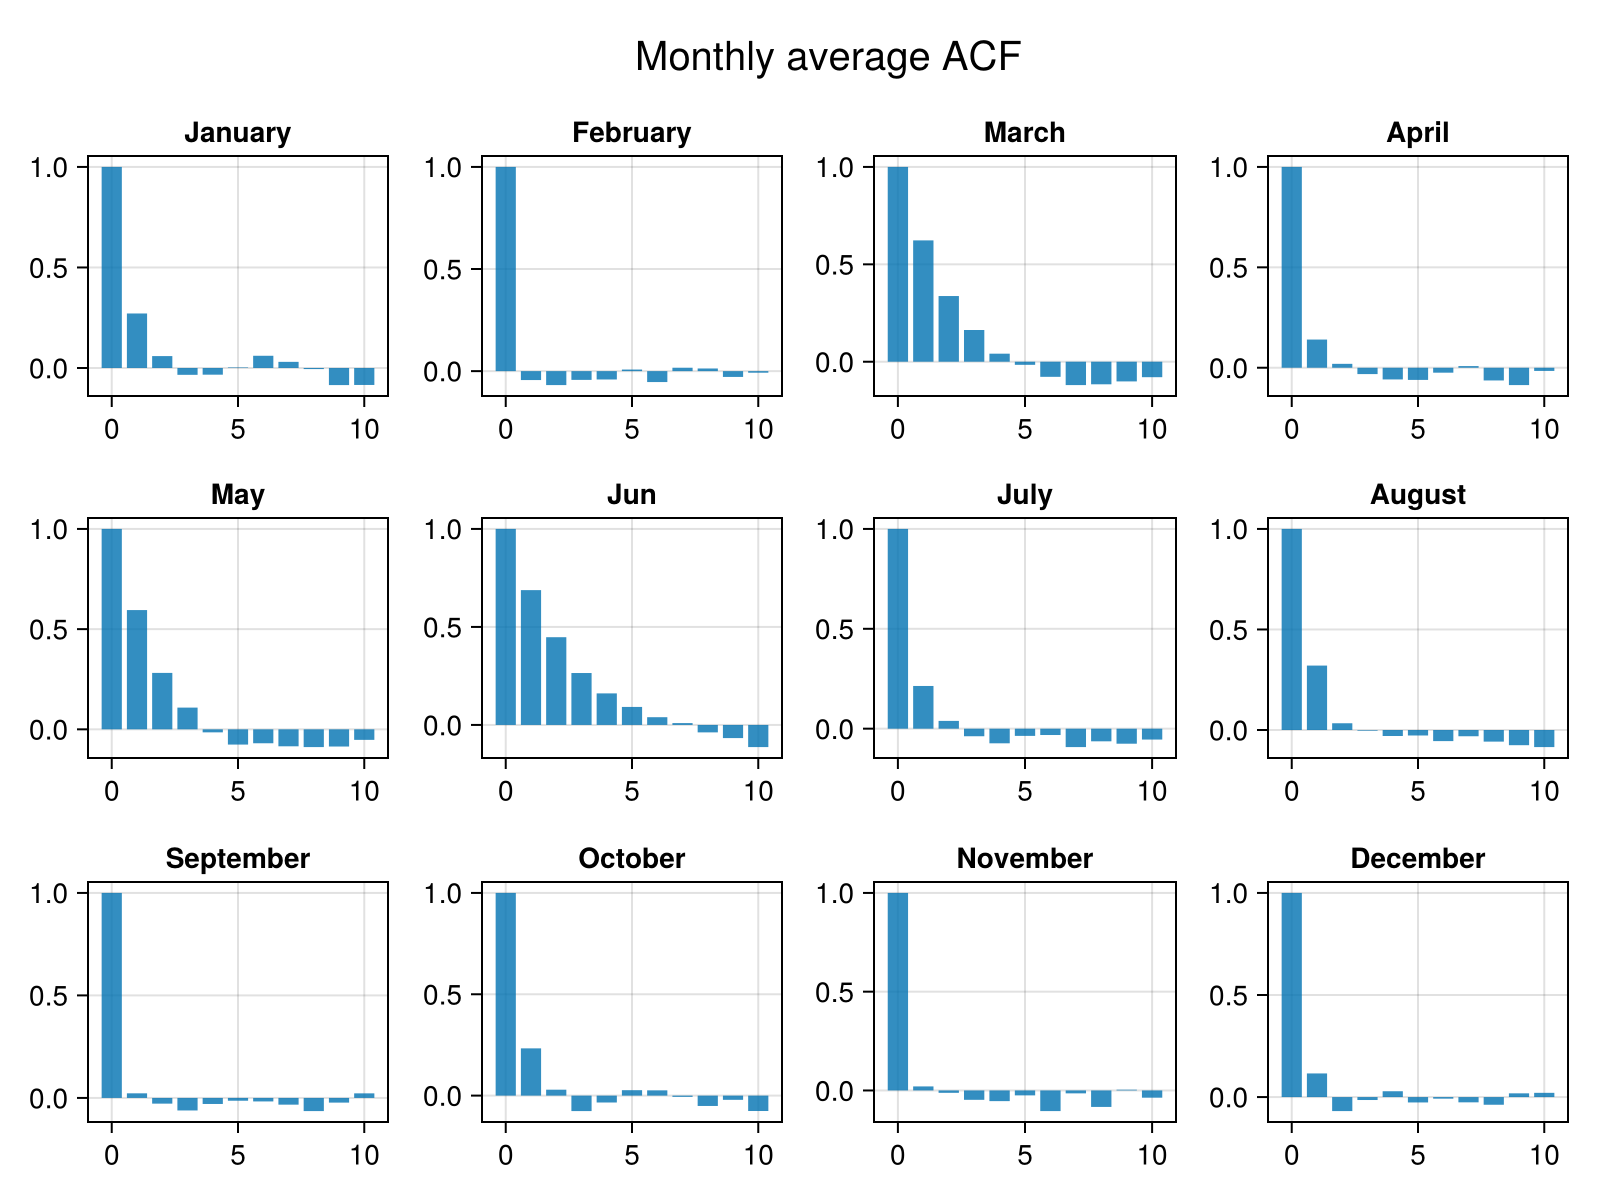

In [282]:
fig=Figure(size=(800,600))
supertitle=Label(fig[1, 1:4], "Monthly average ACF", fontsize = 20)
for i in 1:12
    autocor_vec=[autocor(Monthly_temp[i][j] ,0:10) for j in eachindex(Monthly_temp[i])] #One element per year
    ax,plot=barplot(fig[((i-1) ÷ 4) + 2, (i-1) % 4 + 1], 0:10, mean(autocor_vec) )
    ax.title=Month_vec[i]
end
current_figure()

### PACF

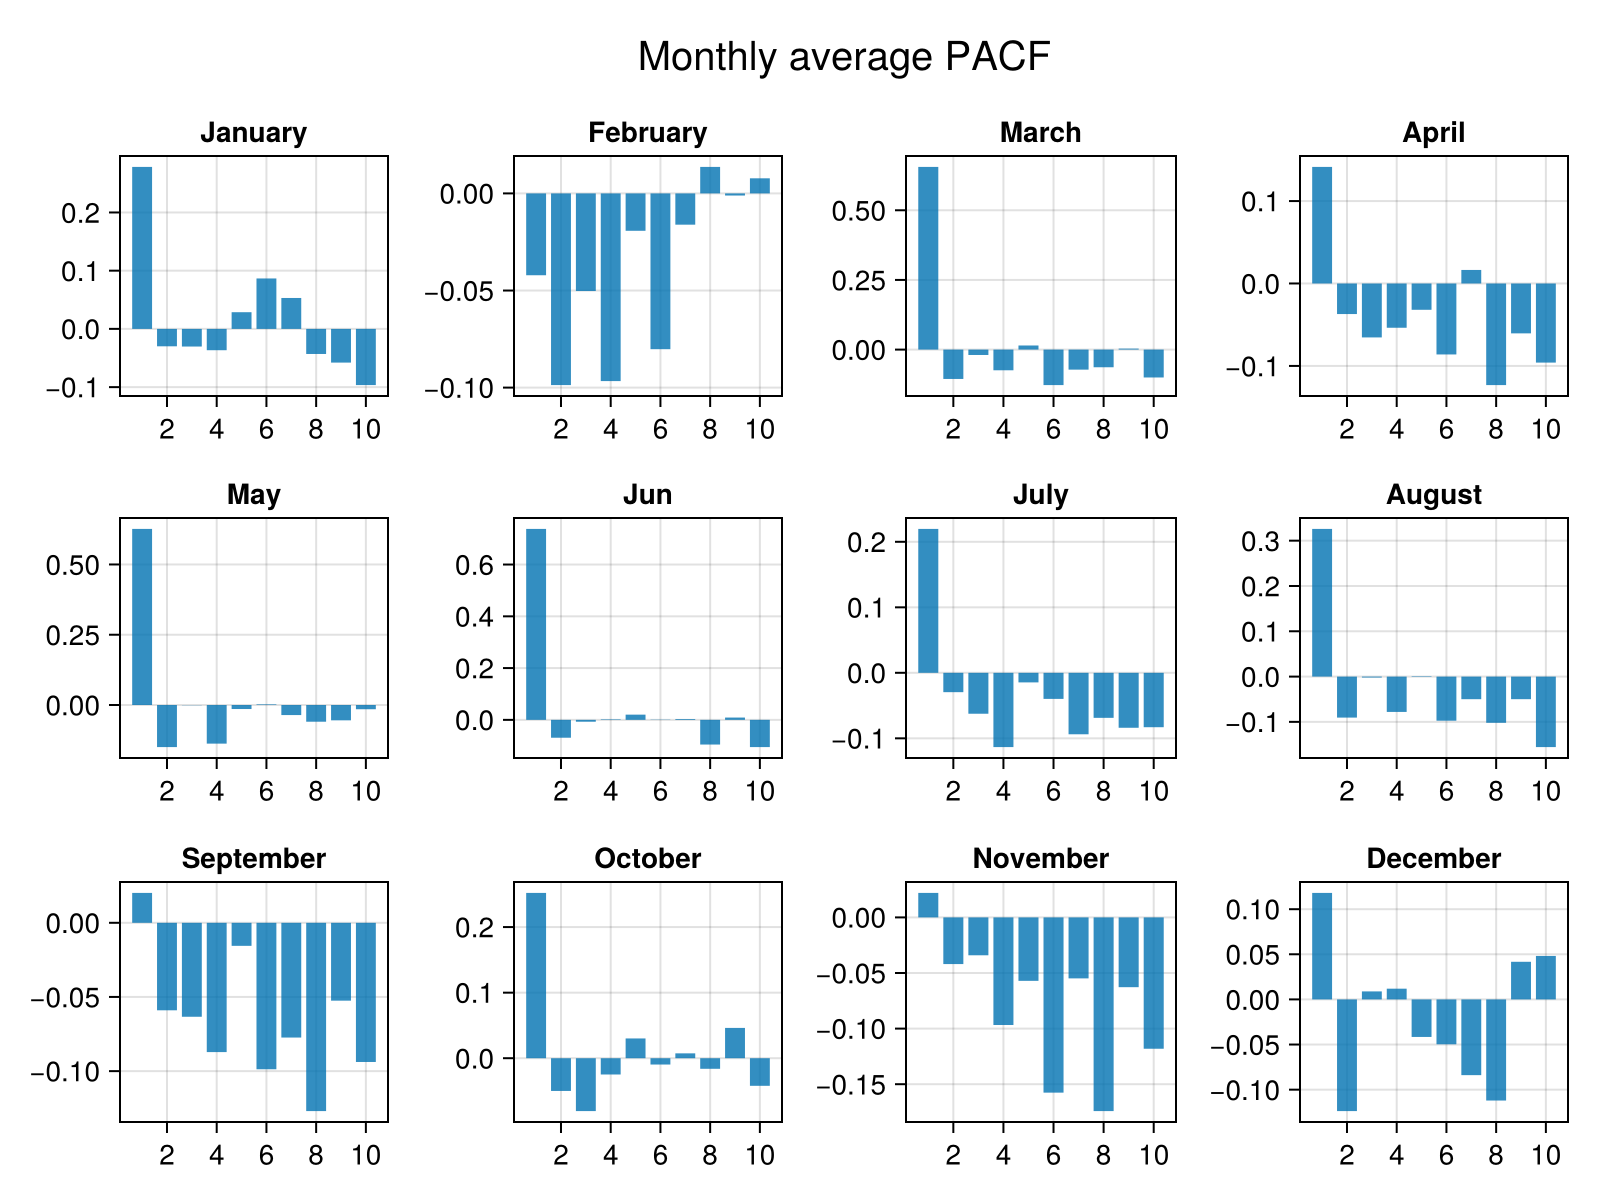

In [283]:
fig=Figure(size=(800,600))
supertitle=Label(fig[1, 1:4], "Monthly average PACF", fontsize = 20)
for i in 1:12
    pacf_vec=[pacf(Monthly_temp[i][j] ,1:10) for j in eachindex(Monthly_temp[i])] #One element per year
    ax,plot=barplot(fig[((i-1) ÷ 4) + 2, (i-1) % 4 + 1], 1:10, mean(pacf_vec) )
    ax.title=Month_vec[i]
end
current_figure()

## 1.One model per year and per month

In [284]:
Monthly_Estimators = [[] for _ in 1:12]
p=1
for i in 1:12
    for x in Monthly_temp[i]
        Est=LL_AR_Estimation(x,p)
        append!(Monthly_Estimators[i],[tuple(Est[1],Est[2]^0.5)])
    end
end
Monthly_Estimators

12-element Vector{Vector{Any}}:
 [([0.3697198705215199], 1.130394477044861), ([0.30437314031727275], 1.4982422582649901), ([0.11951971040568238], 1.392541062075377), ([0.39013169359218436], 1.4113879034720966), ([0.27921750441938764], 1.3392976732092041), ([0.39257454657507507], 1.6336222010055703), ([0.26081953915833267], 1.742811593575582), ([0.5548907742879645], 1.535404673708828), ([0.2798445933750971], 1.1740262592661708), ([0.42190100122897467], 1.6304841863251265), ([0.4511864485767982], 1.388078077072435), ([0.38500251607959823], 1.3526023592215606), ([0.33476645065378186], 1.3967609035348372), ([0.409617793663123], 1.6345887037861584), ([0.0040131421251952525], 1.4949632566943567), ([0.4200942307947972], 1.7781726746728383), ([0.352905244754909], 1.6595634876704783)]
 [([0.3061871044059422], 1.9422201694591898), ([0.09139420150513551], 1.9480587592468395), ([-0.09353118353481599], 1.8508978999145183), ([-0.07237466387348455], 2.018876104368819), ([-0.22485606779748726], 1.8086

In [285]:
Monthly_stats(mean,Monthly_Estimators,2)

12-element Vector{Any}:
 1.481937750035322
 1.8329551180884922
 4.537159935981791
 6.6189533671748935
 7.6970465929050516
 2.959515656259801
 4.311094989868707
 0.9736277391136337
 7.1148273622398746
 2.4725890238389097
 2.9962808124442732
 5.856752931871192

Reminder : 
```julia
Φ_month=[4,1,8,2,7,9,2,4,1,3,1,2]/10
σ_month=[1.5,2,4.5,7,8,3,4.5,1,7,2.5,3,6]
```

Average error of Φ

In [286]:
m=Monthly_stats(mean,Monthly_Estimators,1)
Monthly_mean=[avg[1] for avg in m]
Φ_mean_error=mean(abs.(Monthly_mean.-Φ_month))
Φ_mean_relative_error=mean(abs.((Monthly_mean.-Φ_month)./Φ_month))

Med=Monthly_stats(median,Monthly_Estimators,1)
Monthly_med=[med[1] for med in Med]
Φ_median_error=mean(abs.(Monthly_med.-Φ_month))
Φ_median_relative_error=mean(abs.((Monthly_med.-Φ_month)./Φ_month))

push!(Φ_error_table,("Mean of parameters of each year",Φ_mean_error,Φ_mean_relative_error))
push!(Φ_error_table,("Median of parameters of each year",Φ_median_error,Φ_median_relative_error))

Row,Estimation Method,Error,Relative error
,String,Float64,Float64
1,Whole series,0.00337466,0.00482094
2,Mean of parameters of each year,0.0434451,0.222054
3,Median of parameters of each year,0.042417,0.217294


Average error of σ

In [287]:
Monthly_mean=Monthly_stats(mean,Monthly_Estimators,2)
σ_mean_error=mean(abs.(Monthly_mean.-σ_month))
σ_mean_relative_error=mean(abs.((Monthly_mean.-σ_month)./σ_month))

Med=Monthly_stats(median,Monthly_Estimators,2)
σ_median_error=mean(abs.(Med.-σ_month))
σ_median_relative_error=mean(abs.((Med.-σ_month)./σ_month))

push!(σ_error_table,("Mean of parameters of each year",σ_mean_error,σ_mean_relative_error))
push!(σ_error_table,("Median of parameters of each year",σ_median_error,σ_median_relative_error))

Row,Estimation Method,Error,Relative error
,String,Float64,Float64
1,Whole series,0.0346958,0.00867394
2,Mean of parameters of each year,0.120936,0.0275379
3,Median of parameters of each year,0.14777,0.0358511


### Boxplot

Regrouping all parameters by month

In [288]:
Φ_month_vec = [[month_param[1][1] for month_param in Monthly_Estimators[i]] for i in 1:12] #Must be modified if p>=2
σ_month_vec = [[month_param[2] for month_param in Monthly_Estimators[i]] for i in 1:12]

12-element Vector{Vector{Float64}}:
 [1.130394477044861, 1.4982422582649901, 1.392541062075377, 1.4113879034720966, 1.3392976732092041, 1.6336222010055703, 1.742811593575582, 1.535404673708828, 1.1740262592661708, 1.6304841863251265, 1.388078077072435, 1.3526023592215606, 1.3967609035348372, 1.6345887037861584, 1.4949632566943567, 1.7781726746728383, 1.6595634876704783]
 [1.9422201694591898, 1.9480587592468395, 1.8508978999145183, 2.018876104368819, 1.8086854894678956, 1.4259216326339874, 1.8016914319178885, 2.1130696657633, 1.8480278146501357, 1.471443311263708, 1.4223532176449107, 1.9341490995210857, 2.05760388544957, 1.5901264952032728, 1.888389064331147, 2.198791275622881, 1.839931691045218]
 [4.6780019235940395, 5.208022875747937, 4.723368530212602, 4.843387180331053, 3.8177822516893927, 3.951218417428851, 4.236999500598808, 4.124066262223536, 5.222329329201266, 3.8655086948644914, 4.302417860355549, 4.476141761373957, 5.037155225316132, 4.921724052321689, 4.773228211313711, 4.308

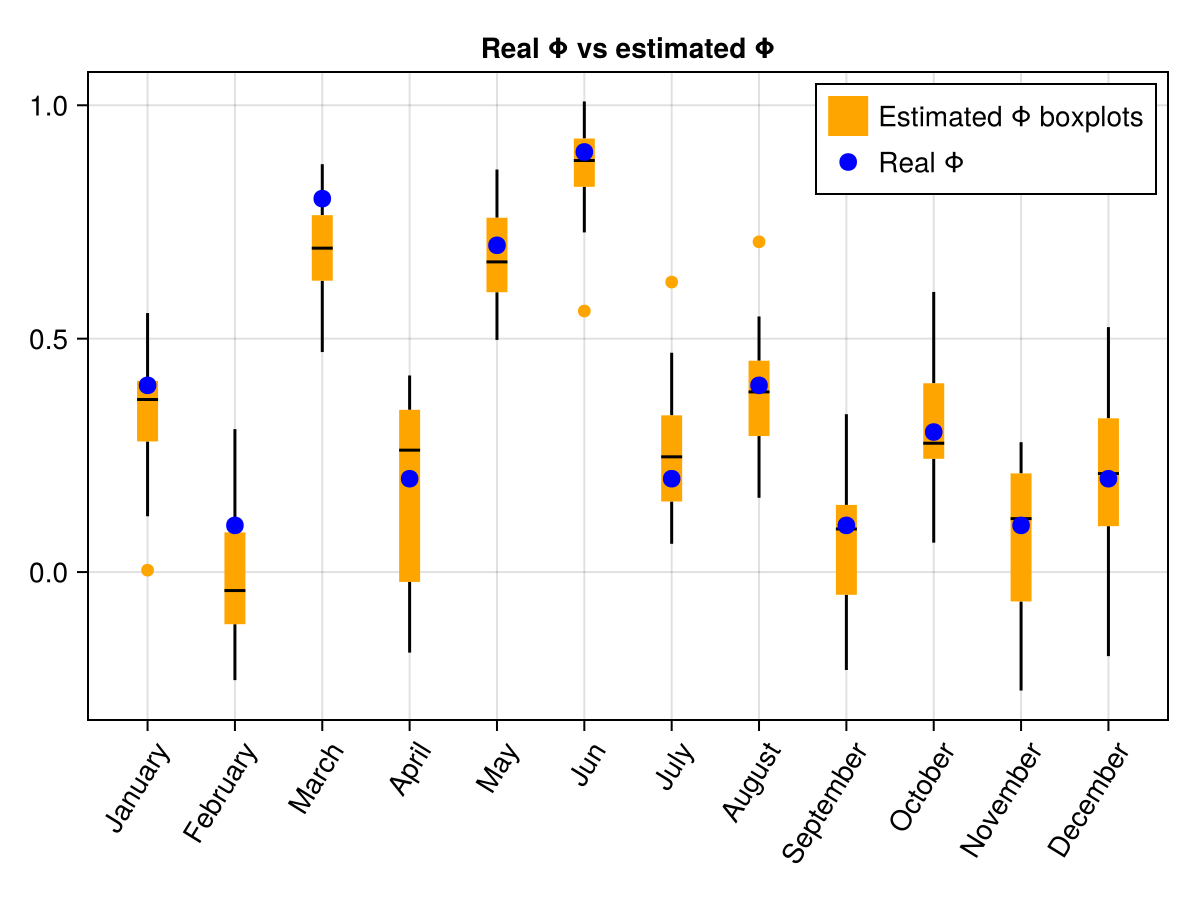

In [289]:
fig,ax,plt1= boxplot(fill(1,length(Φ_month_vec[1])), Φ_month_vec[1] ; width=0.3, color="orange")
for i in 2:12
    boxplot!(ax, fill(i,length(Φ_month_vec[i])), Φ_month_vec[i] ; width=0.3 , color="orange")
end
plt2=scatter!(ax,collect(1:12),Φ_month; color="Blue", markersize=12.5)
ax.title="Real Φ vs estimated Φ"
ax.xticks=(1:12,Month_vec)
ax.xticklabelrotation=45.0
axislegend(ax,[plt1,plt2],["Estimated Φ boxplots","Real Φ"])
fig

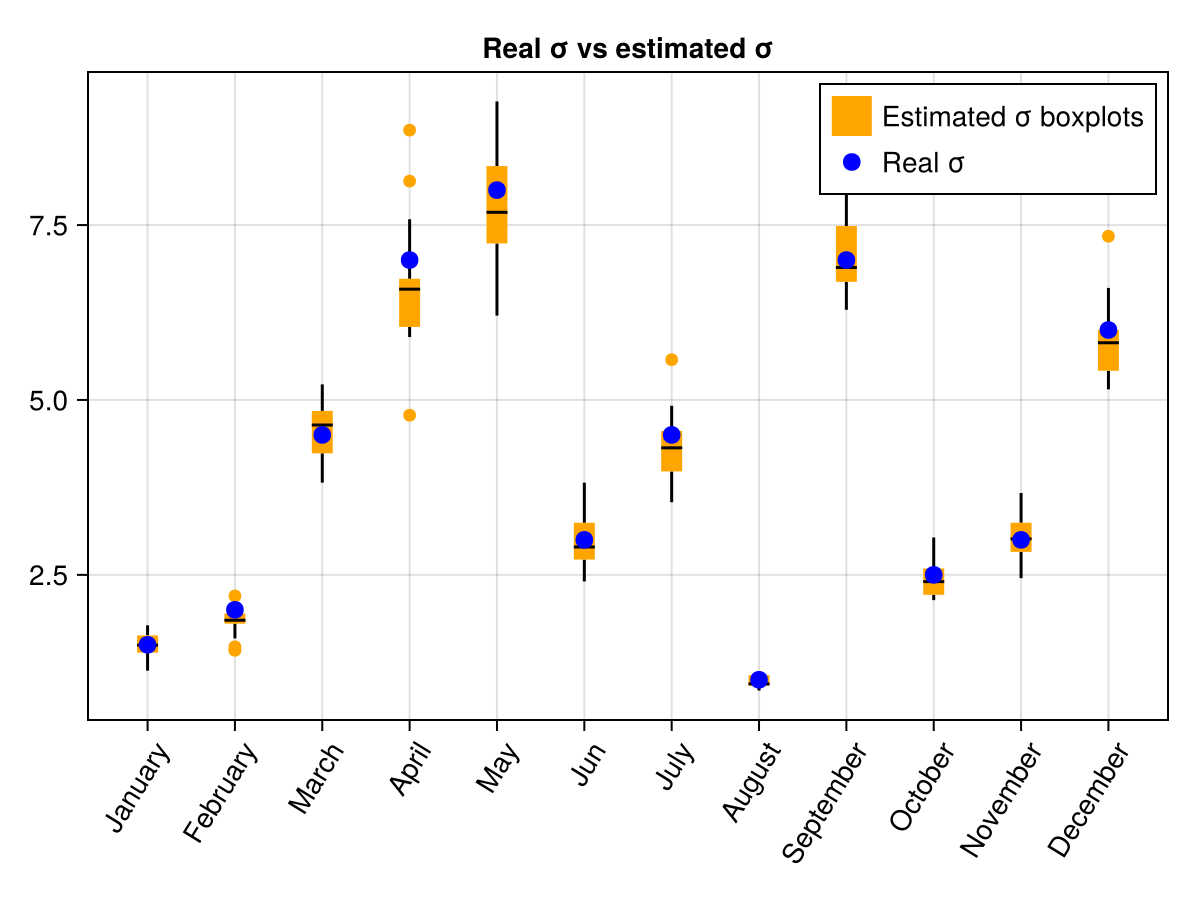

In [290]:
fig,ax,plt1= boxplot(fill(1,length(σ_month_vec[1])), σ_month_vec[1] ; width=0.3, color="orange")
for i in 2:12
    boxplot!(ax, fill(i,length(σ_month_vec[i])), σ_month_vec[i] ; width=0.3 , color="orange")
end
plt2=scatter!(ax,1:12,σ_month; color="Blue", markersize=12.5)
ax.title="Real σ vs estimated σ"
ax.xticks=(1:12,Month_vec)
ax.xticklabelrotation=45.0
axislegend(ax,[plt1,plt2],["Estimated σ boxplots","Real σ"])
fig

## 2.Each month concatanated with all years

For exemple we concatanate January 1960, January 1961, etc. into one series. 

In [291]:
C_Monthly_temp=reduce.(vcat,Monthly_temp)

12-element Vector{Vector{Float64}}:
 [-4.599537334740276, -1.6871436682354817, -2.9269304467100623, -1.5902141169808903, 0.6822641067525237, -1.9541404774139108, -1.306987559839258, -0.4649829236072019, -0.5054303003148978, -0.5547722393392489  …  1.1582800537051323, 0.43178901123359675, 0.6421552246626335, -0.009491826305588091, -3.3701856038151963, -0.19644547839005244, -2.0101041423295842, -0.8209584506598988, -0.8340904659125461, 0.8398620455590903]
 [3.460889459960481, 1.1210386232277354, 1.243467582076603, -2.9955466902519707, 2.9269946117314953, 2.5847776861478406, -0.665413782655689, -1.1262476153560723, 0.7057050617731562, 0.6949469531535886  …  1.9592373877930898, -0.6157237021338714, -3.5058213221214474, -3.233570666373054, -1.9862811839762013, -0.45185846306739264, -0.8030325930790277, -2.162607716749641, -3.122251119354674, -1.4171159239152167]
 [1.6864534739572692, -9.393317634386804, -15.866004063544239, -10.023012000937165, -13.257754423067958, -8.806647128634136, -7.07

In [292]:
p=1
Φ_month_concat=[]
σ_month_concat=[]
for x in C_Monthly_temp
    Estimation=LL_AR_Estimation(x,1)
    append!(Φ_month_concat,Estimation[1])
    append!(σ_month_concat,Estimation[2]^0.5)
end

In [293]:
Φ_concat_error=mean(abs.(Φ_month_concat.-Φ_month))
Φ_concat_relative_error=mean(abs.((Φ_month_concat.-Φ_month)./Φ_month))
push!(Φ_error_table,("For each month all years concatanated",Φ_concat_error,Φ_concat_relative_error))

σ_concat_error=mean(abs.(σ_month_concat.-σ_month))
σ_concat_relative_error=mean(abs.((σ_month_concat.-σ_month)./σ_month))
push!(σ_error_table,("For each month all years concatanated",σ_concat_error,σ_concat_relative_error))

Row,Estimation Method,Error,Relative error
,String,Float64,Float64
1,Whole series,0.0346958,0.00867394
2,Mean of parameters of each year,0.120936,0.0275379
3,Median of parameters of each year,0.14777,0.0358511
4,For each month all years concatanated,0.163403,0.0508224


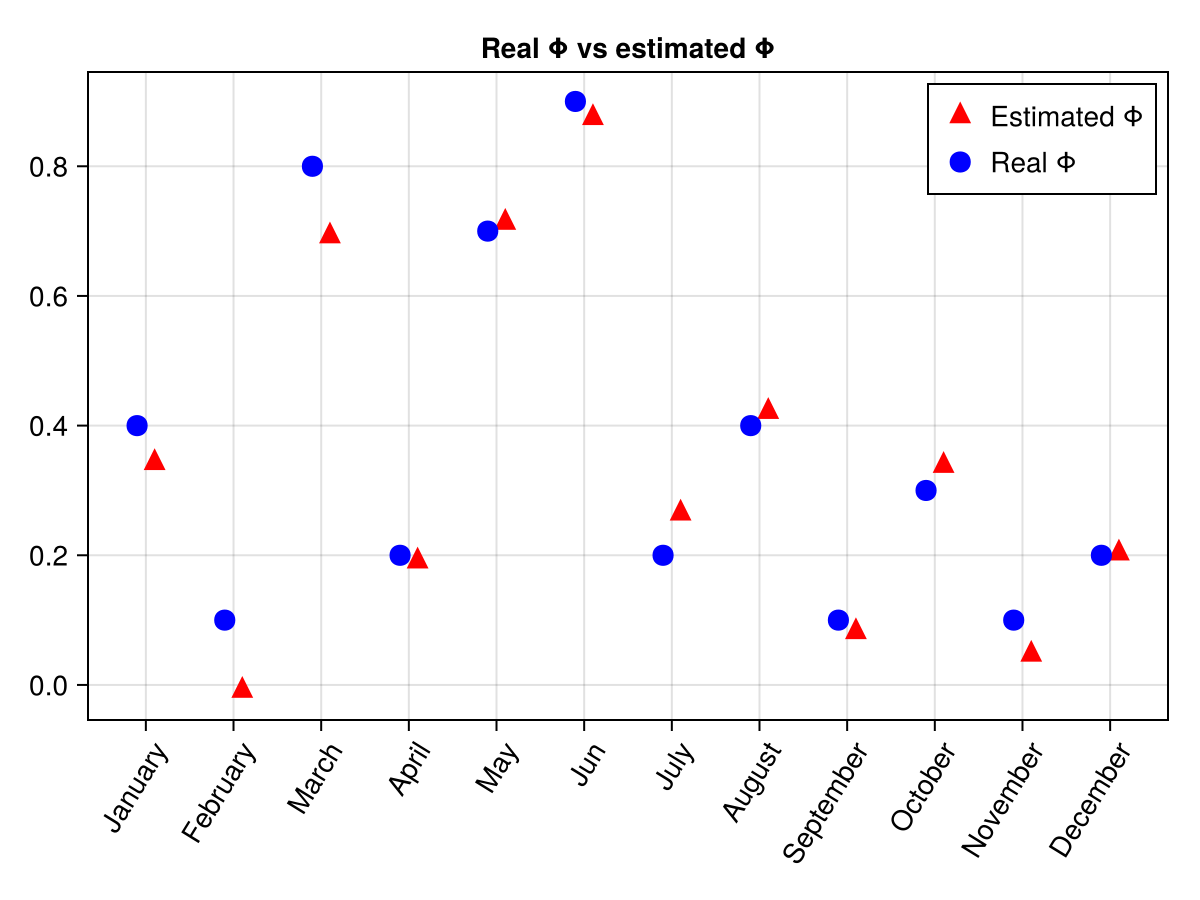

In [294]:
fig,ax,plt1= scatter((1:12) .+ 0.1,  Φ_month_concat ;  color="red" , marker=:utriangle, markersize=15)
plt2=scatter!(ax,(1:12) .- 0.1,Φ_month; color="Blue", markersize=15)
ax.title="Real Φ vs estimated Φ"
ax.xticks=(1:12,Month_vec)
ax.xticklabelrotation=45.0
axislegend(ax,[plt1,plt2],["Estimated Φ","Real Φ"])
fig

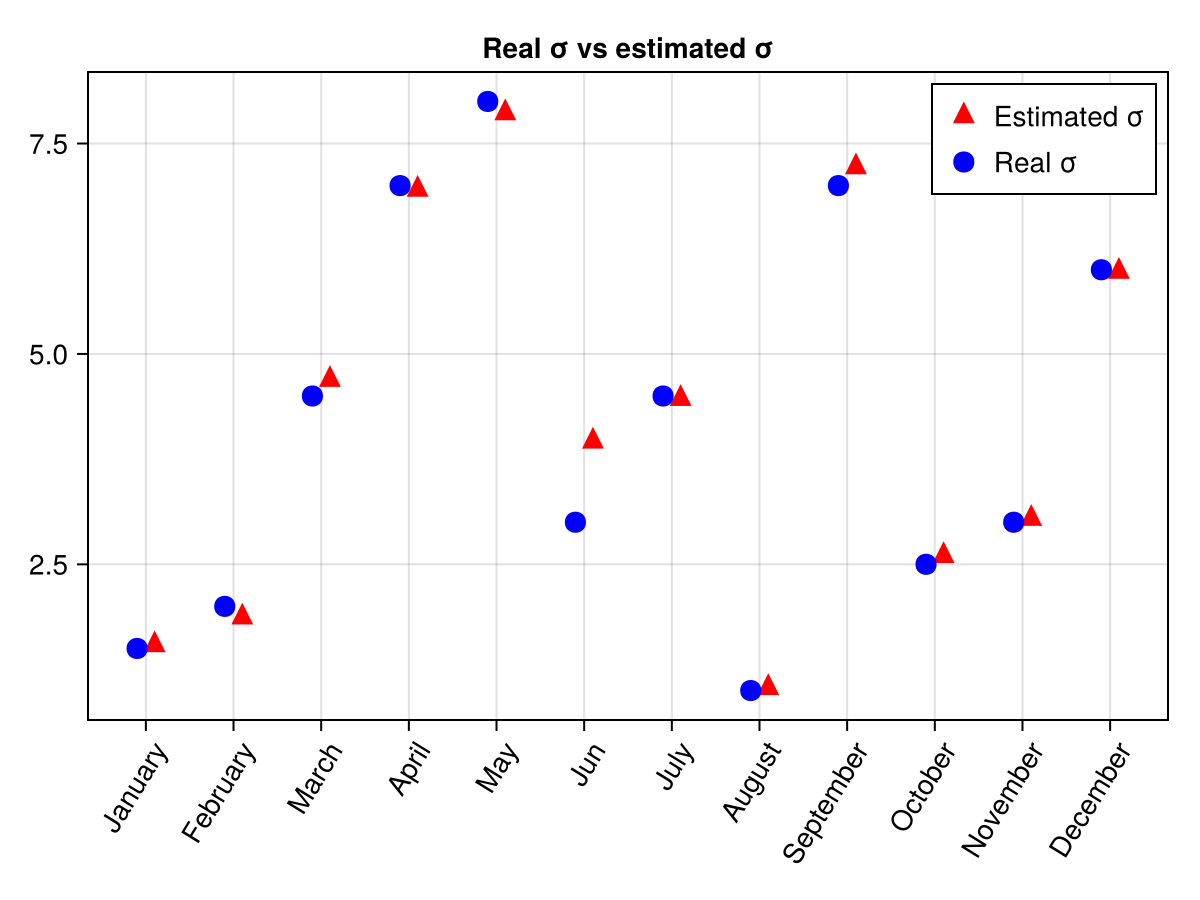

In [295]:
fig,ax,plt1= scatter((1:12) .+ 0.1,  σ_month_concat ;  color="red" , marker=:utriangle, markersize=15)
plt2=scatter!(ax,(1:12) .- 0.1,σ_month; color="Blue", markersize=15)
ax.title="Real σ vs estimated σ"
ax.xticks=(1:12,Month_vec)
ax.xticklabelrotation=45.0
axislegend(ax,[plt1,plt2],["Estimated σ","Real σ"])
fig

## 3.One likelyhood for each month

In [296]:
p=1
Φ_month_sumLL=[]
σ_month_sumLL=[]
for x_month in Monthly_temp
    Estimation=LL_AR_Estimation_sum(x_month,1)
    append!(Φ_month_sumLL,Estimation[1])
    append!(σ_month_sumLL,Estimation[2]^0.5)
end

In [297]:
Φ_sumLL_error=mean(abs.(Φ_month_sumLL.-Φ_month))
Φ_sumLL_relative_error=mean(abs.((Φ_month_sumLL.-Φ_month)./Φ_month))
push!(Φ_error_table,("For each month the LL is summed",Φ_sumLL_error,Φ_sumLL_relative_error))

σ_sumLL_error=mean(abs.(σ_month_sumLL.-σ_month))
σ_sumLL_relative_error=mean(abs.((σ_month_sumLL.-σ_month)./σ_month))
push!(σ_error_table,("For each month the LL is summed",σ_sumLL_error,σ_sumLL_relative_error))

Row,Estimation Method,Error,Relative error
,String,Float64,Float64
1,Whole series,0.0346958,0.00867394
2,Mean of parameters of each year,0.120936,0.0275379
3,Median of parameters of each year,0.14777,0.0358511
4,For each month all years concatanated,0.163403,0.0508224
5,For each month the LL is summed,0.0880936,0.0207388


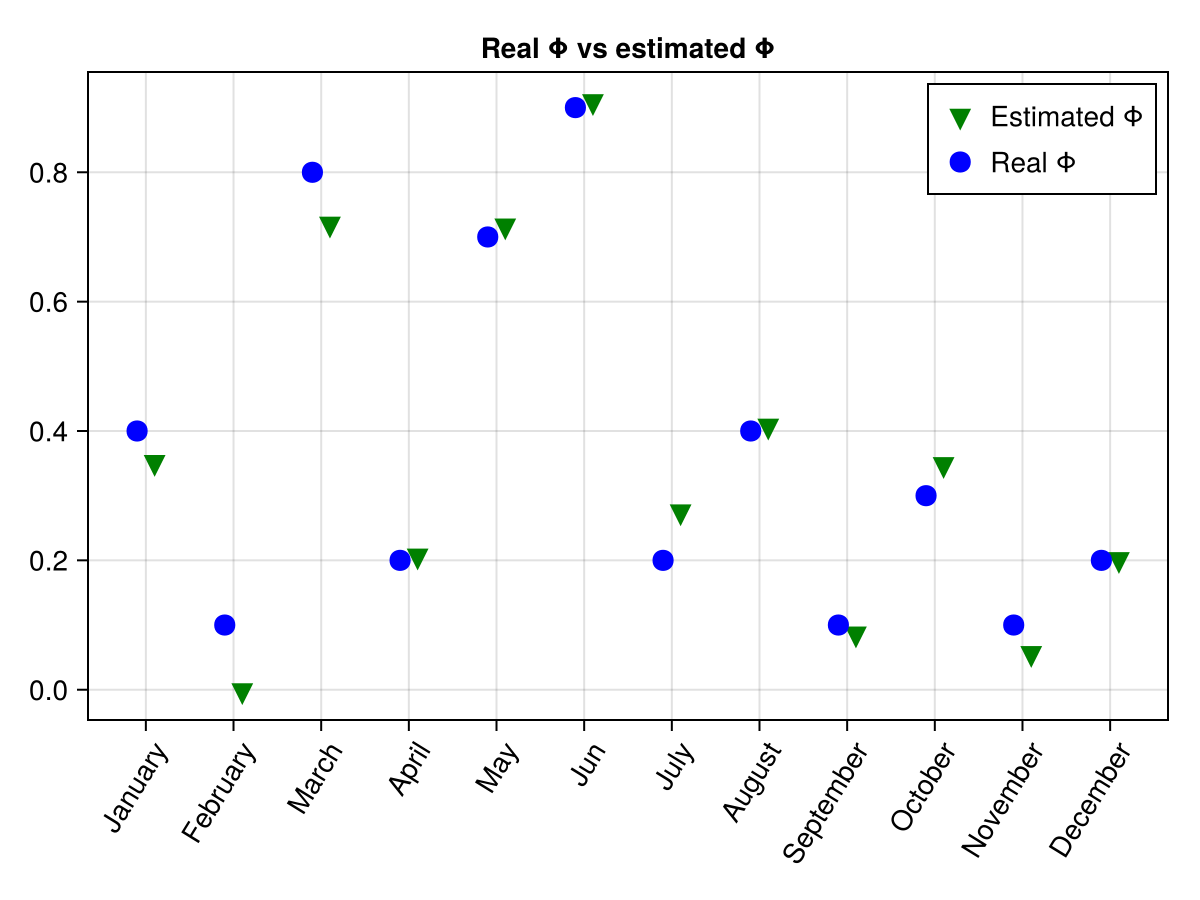

In [298]:
fig,ax,plt1= scatter((1:12) .+ 0.1,  Φ_month_sumLL ;  color="green" , marker=:dtriangle, markersize=15)
plt2=scatter!(ax,(1:12) .- 0.1,Φ_month; color="Blue", markersize=15)
ax.title="Real Φ vs estimated Φ"
ax.xticks=(1:12,Month_vec)
ax.xticklabelrotation=45.0
axislegend(ax,[plt1,plt2],["Estimated Φ","Real Φ"])
fig

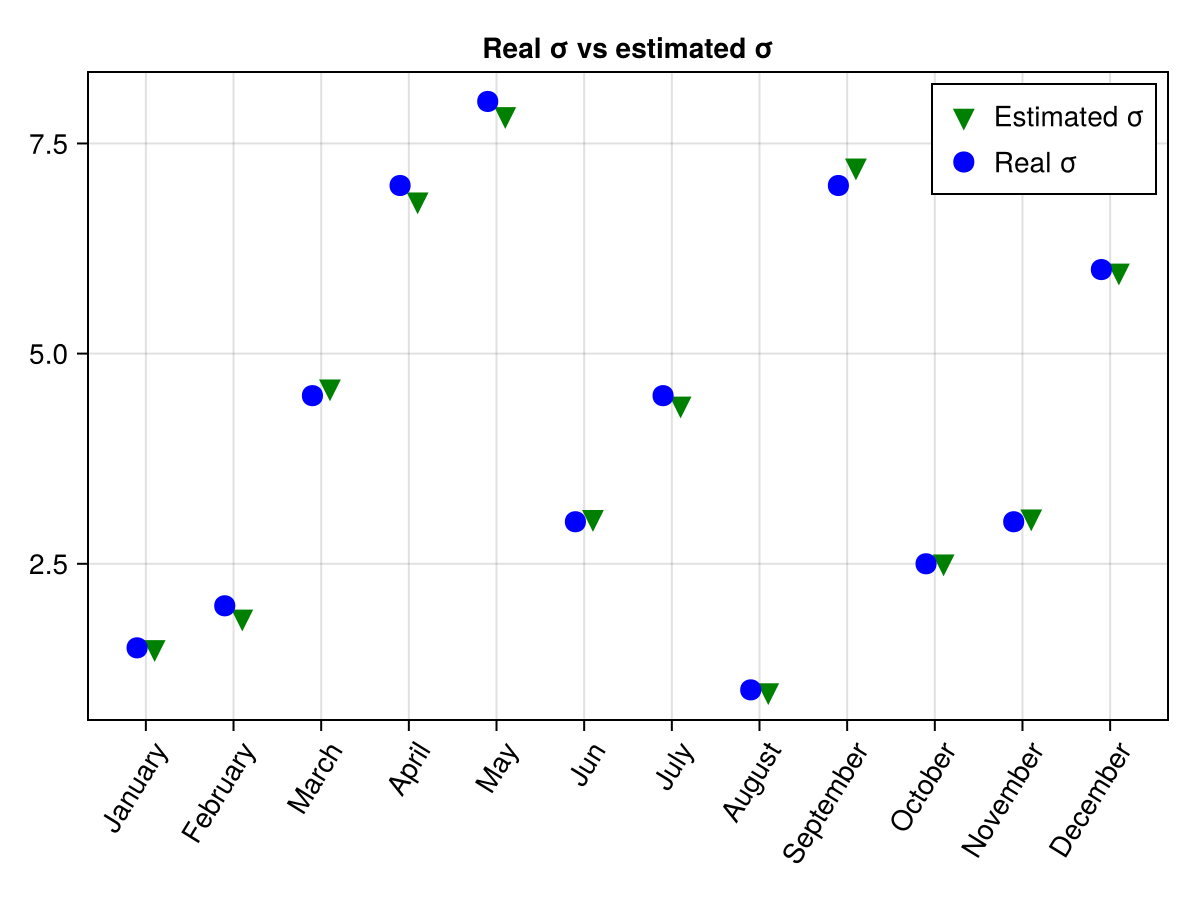

In [299]:
fig,ax,plt1= scatter((1:12) .+ 0.1,  σ_month_sumLL ;  color="green" , marker=:dtriangle, markersize=15)
plt2=scatter!(ax,(1:12) .- 0.1,σ_month; color="Blue", markersize=15)
ax.title="Real σ vs estimated σ"
ax.xticks=(1:12,Month_vec)
ax.xticklabelrotation=45.0
axislegend(ax,[plt1,plt2],["Estimated σ","Real σ"])
fig

## Comparing all methods

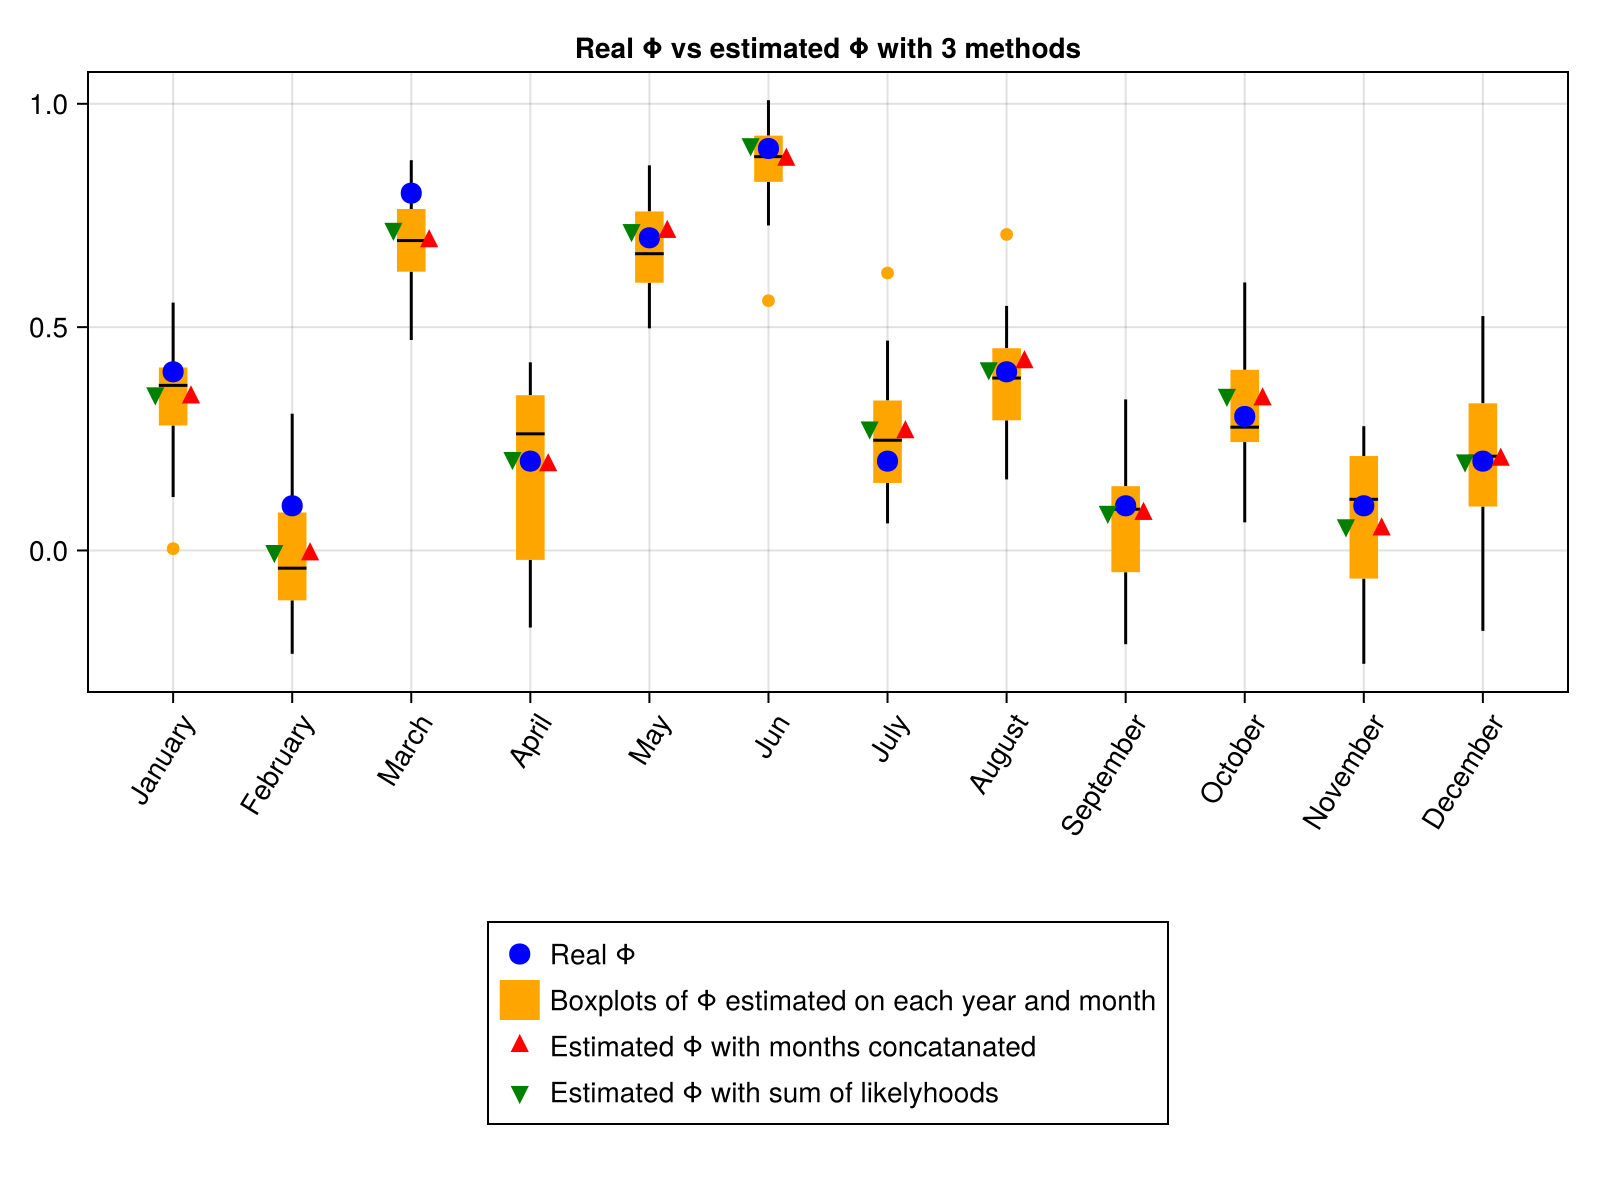

In [300]:
fig=Figure(size=(800,600))
ax,plt1= boxplot(fig[1:2,1:2],fill(1,length(Φ_month_vec[1])), Φ_month_vec[1] ; width=0.3, color="orange")
for i in 2:12
    boxplot!(ax, fill(i,length(Φ_month_vec[i])), Φ_month_vec[i] ; width=0.3 , color="orange")
end
plt2=scatter!(ax,collect(1:12),Φ_month; color="Blue", markersize=15)
plt3=scatter!(ax,collect(1:12).+0.15,Φ_month_concat; color="red", marker=:utriangle, markersize=12.5)
plt4=scatter!(ax,collect(1:12).-0.15,Φ_month_sumLL; color="green", marker=:dtriangle, markersize=12.5)
ax.title="Real Φ vs estimated Φ with 3 methods"
ax.xticks=(1:12,Month_vec)
ax.xticklabelrotation=45.0
Legend(fig[3,1:2],[plt2,plt1,plt3,plt4],["Real Φ","Boxplots of Φ estimated on each year and month","Estimated Φ with months concatanated", "Estimated Φ with sum of likelyhoods"])
fig

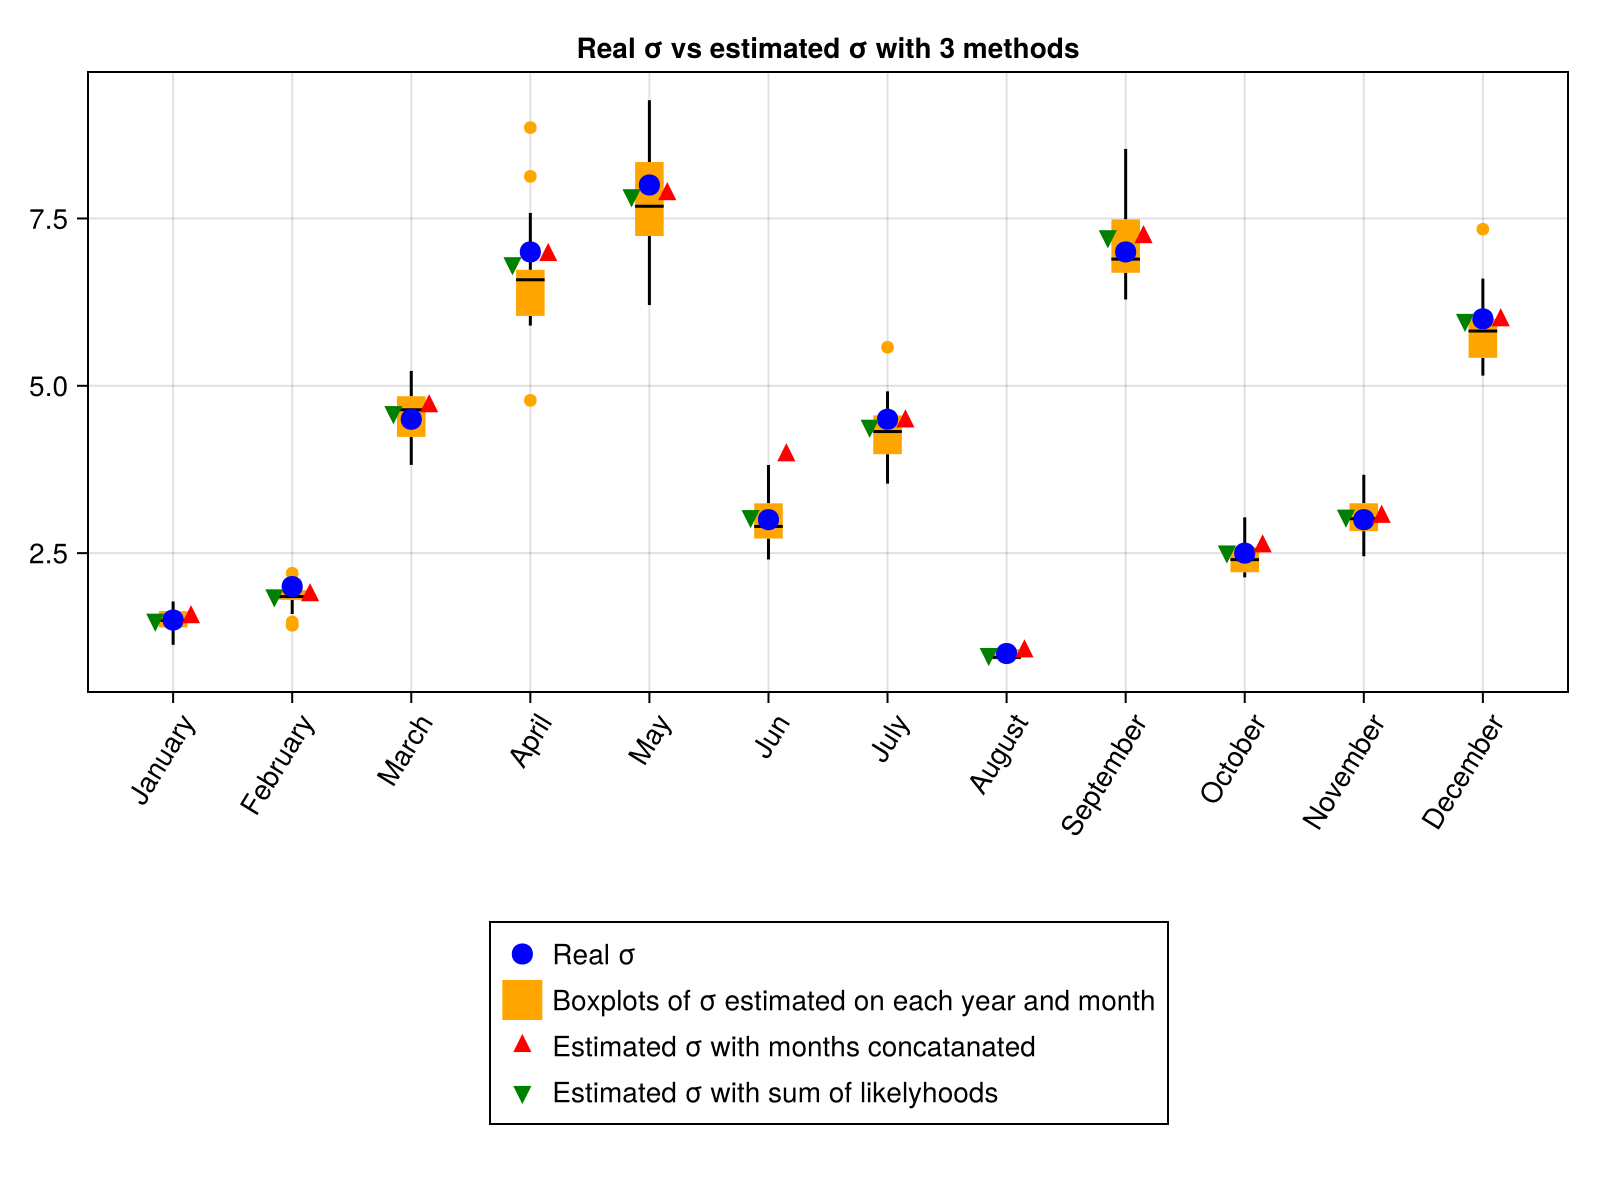

In [301]:
fig=Figure(size=(800,600))
ax,plt1= boxplot(fig[1:2,1:2],fill(1,length(σ_month_vec[1])), σ_month_vec[1] ; width=0.3, color="orange")
for i in 2:12
    boxplot!(ax, fill(i,length(σ_month_vec[i])), σ_month_vec[i] ; width=0.3 , color="orange")
end
plt2=scatter!(ax,collect(1:12),σ_month; color="Blue", markersize=15)
plt3=scatter!(ax,collect(1:12).+0.15,σ_month_concat; color="red", marker=:utriangle, markersize=12.5)
plt4=scatter!(ax,collect(1:12).-0.15,σ_month_sumLL; color="green", marker=:dtriangle, markersize=12.5)
ax.title="Real σ vs estimated σ with 3 methods"
ax.xticks=(1:12,Month_vec)
ax.xticklabelrotation=45.0
Legend(fig[3,1:2],[plt2,plt1,plt3,plt4],["Real σ","Boxplots of σ estimated on each year and month","Estimated σ with months concatanated", "Estimated σ with sum of likelyhoods"])
fig

# Error and relative error for each methods

If the method is based on a monthly estimation of paramaters, the result showed is the average error and the average relative error of the twelve parameters.

In [302]:
Φ_error_table

Row,Estimation Method,Error,Relative error
,String,Float64,Float64
1,Whole series,0.00337466,0.00482094
2,Mean of parameters of each year,0.0434451,0.222054
3,Median of parameters of each year,0.042417,0.217294
4,For each month all years concatanated,0.043335,0.223992
5,For each month the LL is summed,0.037799,0.203484


In [303]:
σ_error_table

Row,Estimation Method,Error,Relative error
,String,Float64,Float64
1,Whole series,0.0346958,0.00867394
2,Mean of parameters of each year,0.120936,0.0275379
3,Median of parameters of each year,0.14777,0.0358511
4,For each month all years concatanated,0.163403,0.0508224
5,For each month the LL is summed,0.0880936,0.0207388
